In [1]:
import pandas as pd
import os

In [9]:
os.chdir("C:\\Users\\wichi\\OneDrive\\Documentos\\EBAC\\Data Science\\Actividades\\Cluster Jerarquico")
df_original = pd.read_excel("Amazon.xlsx")
df_original.head()

,Cliente,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
2,Bernard,17,26,285,3,43,27,41,26,33
3,Edward,135,5,355,295,18,23,39,195,17
4,Emilia,3,45,48,39,34,46,225,34,43


In [10]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Cliente            100 non-null    object
 1   Velocidad Entrega  100 non-null    int64 
 2   Precio             100 non-null    int64 
 3   Durabilidad        100 non-null    int64 
 4   Imagen Producto    100 non-null    int64 
 5   Valor Educativo    100 non-null    int64 
 6   Servicio Retorno   100 non-null    int64 
 7   Tamano Paquete     100 non-null    int64 
 8   Calidad Producto   100 non-null    int64 
 9   Numero Estrellas   100 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 7.9+ KB


In [29]:
#Normalizar los datos
from sklearn.preprocessing import normalize
ar_normalize = normalize(df_original.iloc[:,1:])


In [21]:
columns = df_original.columns.tolist()
df_normalize = pd.DataFrame(ar_normalize, columns = columns[1:])
df_normalize

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,0.438263,0.006414,0.737565,0.502399,0.051309,0.049171,0.055585,0.044895,0.036344
1,0.023235,0.038725,0.813234,0.085196,0.064542,0.010327,0.108431,0.555065,0.072287
2,0.057235,0.087535,0.959520,0.010100,0.144770,0.090902,0.138036,0.087535,0.111102
3,0.258856,0.009587,0.680696,0.565649,0.034514,0.044101,0.074781,0.373904,0.032597
4,0.011975,0.179625,0.191600,0.155675,0.135717,0.183617,0.898127,0.135717,0.171642
...,...,...,...,...,...,...,...,...,...
95,0.045932,0.122484,0.489936,0.382763,0.107174,0.321521,0.643041,0.260279,0.015311
96,0.640241,0.052479,0.096561,0.050380,0.069272,0.058776,0.745198,0.054578,0.094462
97,0.005043,0.070602,0.131118,0.126075,0.121032,0.136161,0.211805,0.932952,0.115989
98,0.357707,0.025386,0.773109,0.078465,0.060003,0.066926,0.096927,0.496175,0.062310


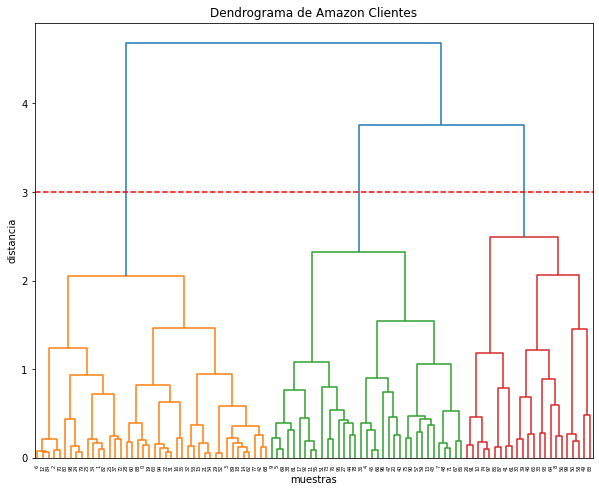

In [36]:
#Generar algoritmo de cluster jerarquicos
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10,8))
plt.title('Dendrograma de Amazon Clientes')
plt.xlabel('muestras')
plt.ylabel('distancia')
dend = shc.dendrogram(shc.linkage(df_normalize, method ="ward"))
plt.axhline(y=3, color = "r", linestyle = "--") # Esta linea se coloca despues de graficar el dendograma por primera vez
plt.show()


A partir de la visualización del dendrograma, se puede concluir que existen tres grupos o clusters en los que es posible categorizar a los clientes según sus calificaciones de productos. La linea punteada muestra el umbral de la distancia entre clusters para considerarse otro cluster.

In [34]:
# Imprimamos de una manera textual los cluster creados para corroborar la conclusión
Clusters = len(set(dend["color_list"]))-1
print(f'El numero de clusters mostrados en el dendograma son {Clusters}')

El numero de clusters mostrados en el dendograma son 3


In [40]:
#El siguiente paso es ahora si etiquetar los datos del data set, para eso tenemos que extraer la categorizacion.
from sklearn.cluster import AgglomerativeClustering
model_cluster = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
labels_data = model_cluster.fit_predict(df_normalize)
print("Estos son la categorizacion de los datos", labels_data)


Estos son la categorizacion de los datos [1 1 1 1 2 2 1 2 0 2 0 2 1 2 1 1 1 2 1 1 2 1 1 1 1 1 0 2 1 1 0 1 1 0 1 1 2
 1 2 0 2 0 1 2 2 2 0 2 2 0 0 2 1 1 1 2 0 2 0 2 1 0 1 1 0 0 2 2 1 2 1 2 1 2
 0 2 2 1 2 1 1 2 1 0 1 0 2 0 1 1 2 0 2 0 1 2 2 0 1 0]


Ahora ya con las etiquetas podemos integrarlo al Dataset normalizado

In [42]:
df_normalize["Cluster"] = labels_data
df_normalize

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Cluster
0,0.438263,0.006414,0.737565,0.502399,0.051309,0.049171,0.055585,0.044895,0.036344,1
1,0.023235,0.038725,0.813234,0.085196,0.064542,0.010327,0.108431,0.555065,0.072287,1
2,0.057235,0.087535,0.959520,0.010100,0.144770,0.090902,0.138036,0.087535,0.111102,1
3,0.258856,0.009587,0.680696,0.565649,0.034514,0.044101,0.074781,0.373904,0.032597,1
4,0.011975,0.179625,0.191600,0.155675,0.135717,0.183617,0.898127,0.135717,0.171642,2
...,...,...,...,...,...,...,...,...,...,...
95,0.045932,0.122484,0.489936,0.382763,0.107174,0.321521,0.643041,0.260279,0.015311,2
96,0.640241,0.052479,0.096561,0.050380,0.069272,0.058776,0.745198,0.054578,0.094462,2
97,0.005043,0.070602,0.131118,0.126075,0.121032,0.136161,0.211805,0.932952,0.115989,0
98,0.357707,0.025386,0.773109,0.078465,0.060003,0.066926,0.096927,0.496175,0.062310,1


Podemos corroborar los cluster a traves de un grafico scatterplot, en este caso vamos a graficar solo la relacion que existe entre calidad de producto y precio

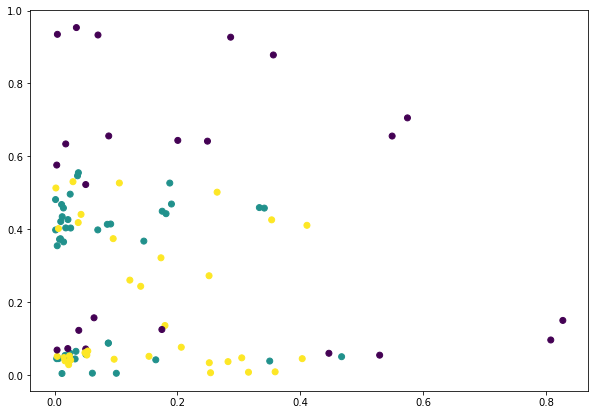

In [43]:
plt.figure(figsize = (10,7))
plt.scatter(df_normalize["Precio"],df_normalize["Calidad Producto"], c = df_normalize["Cluster"])
plt.show()

Al tener un data set con muchas dimensiones, puede se que la relacion entre las dimensiones que seleccionamos para graficar no siempre guarden una relacion es por eso que utilizaremos el metodo PCA para reducir las dimensiones del Dataset

In [47]:
#PCA
Valores_dataset = df_normalize.iloc[:,0:9].values
Valores_dataset

array([[0.43826336, 0.00641361, 0.73756517, 0.50239946, 0.05130888,
        0.04917101, 0.05558462, 0.04489527, 0.03634379],
       [0.02323527, 0.03872544, 0.81323434, 0.08519598, 0.06454241,
        0.01032679, 0.10843125, 0.55506471, 0.0722875 ],
       [0.05723452, 0.08753514, 0.95951982, 0.01010021, 0.14476966,
        0.09090188, 0.13803618, 0.08753514, 0.11110229],
       [0.25885639, 0.00958727, 0.68069644, 0.56564916, 0.03451419,
        0.04410146, 0.07478074, 0.37390368, 0.03259673],
       [0.01197502, 0.17962533, 0.19160036, 0.15567529, 0.13571692,
        0.18361701, 0.89812667, 0.13571692, 0.17164198],
       [0.14494006, 0.251738  , 0.60264551, 0.03661644, 0.03966781,
        0.02898801, 0.73995715, 0.03356507, 0.00457705],
       [0.04755854, 0.02481315, 0.98218723, 0.06823617, 0.07237169,
        0.09304932, 0.07857498, 0.05996511, 0.06410064],
       [0.13323393, 0.04304481, 0.06354234, 0.52268696, 0.05739308,
        0.04509456, 0.70716471, 0.44069685, 0.05944283],


In [51]:
from sklearn import decomposition 
pca = decomposition.PCA(n_components = 2)
pca.fit(Valores_dataset)
components_2= pca.transform(Valores_dataset)
data_frame_pca = pd.DataFrame(components_2, columns = ["PC1","PC2"])
data_frame_pca

,PC1,PC2
0,-0.399932,0.060354
1,-0.408296,-0.064023
2,-0.497032,-0.359553
3,-0.339967,0.184345
4,0.582078,-0.387977
...,...,...
95,0.185277,-0.234391
96,0.535275,-0.147924
97,0.191641,0.368249
98,-0.384873,0.036584


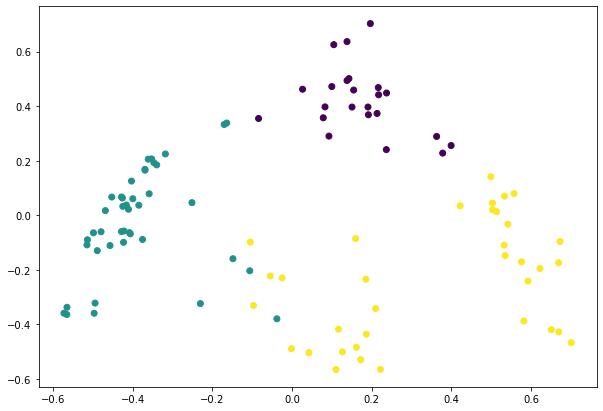

In [53]:
plt.figure(figsize = (10,7))
plt.scatter(components_2[:,0],components_2[:,1], c = df_normalize["Cluster"])
plt.show()

Ahora si podemos ver claramente como se dividen los clusters, gracias a los componentes principales podemos representar los componentes principales del datases y con el cluster jerarquico podemos etiquetar los datos y obtener graficamente los clusters.

El siguiente paso es determinar que clientes se encuentran en el mismo cluster para de esta manera recomendarles los mismos productos.

In [55]:
#Agregamos los nombres al data set
df_original["Cluster"] = labels_data
df_original

,Cliente,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Cluster
0,Adam,205,3,345,235,24,23,26,21,17,1
1,Anna,9,15,315,33,25,4,42,215,28,1
2,Bernard,17,26,285,3,43,27,41,26,33,1
3,Edward,135,5,355,295,18,23,39,195,17,1
4,Emilia,3,45,48,39,34,46,225,34,43,2
...,...,...,...,...,...,...,...,...,...,...,...
95,Teofan,3,8,32,25,7,21,42,17,1,2
96,Teofil,305,25,46,24,33,28,355,26,45,2
97,Teofila,1,14,26,25,24,27,42,185,23,0
98,Teon,155,11,335,34,26,29,42,215,27,1


In [82]:
#Segmentar Clientes por clusters
df_cluster1 = df_original.query("Cluster==0") 
df_cluster2 = df_original.query("Cluster==1")
df_cluster3 = df_original.query("Cluster==2")
#Obtener los clientes unicos en cada cluster
clientes_1 = list(set(df_cluster1["Cliente"]))
clientes_2 = list(set(df_cluster2["Cliente"]))
clientes_3 = list(set(df_cluster3["Cliente"]))

clientes_diccionary = {f'clientes_{i}': cliente for i, cliente in enumerate([clientes_1, clientes_2, clientes_3])}

In [83]:
choice = str(input("Escribe el nombre de un cliente: "))

for key, value in clientes_diccionary.items():
    if choice in value:
        print(f'El cliente pertenece al cluster {key}')
        print(f'y se le pueden recomendar los mismos productos que compraron: ')
        for cliente in clientes_diccionary[key] :
            print(cliente)

Escribe el nombre de un cliente: Xavier
El cliente pertenece al cluster clientes_0
y se le pueden recomendar los mismos productos que compraron: 
Lesia
Xavier
Margaret
Marisol
Isadore
Leonid
Marianna
Tamara
Josephine
Maksym
Sandra
Teresa
Savina
Lawrence
Michaelina
Florent
Martha
Martin
Teofila
Sylvan
Herman
John
Sophia
